<a target="_blank" href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/rapids-pip-colab-template.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Install RAPIDS into Colab"/>
</a>

# RAPIDS cuDF is now already on your Colab instance!
RAPIDS cuDF is preinstalled on Google Colab and instantly accelerates Pandas with zero code changes. [You can quickly get started with our tutorial notebook](https://nvda.ws/rapids-cudf). This notebook template is for users who want to utilize the full suite of the RAPIDS libraries for their workflows on Colab.  

# Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

You can check the output of `!nvidia-smi` to check which GPU you have.  Please uncomment the cell below if you'd like to do that.  Currently, RAPIDS runs on all available Colab GPU instances.

In [10]:
# !nvidia-smi

#Setup:
This set up script:

1. Checks to make sure that the GPU is RAPIDS compatible
1. Pip Installs the RAPIDS' libraries, which are:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuxFilter
  1. cuCIM
  1. xgboost

# Controlling Which RAPIDS Version is Installed
This line in the cell below, `!python rapidsai-csp-utils/colab/pip-install.py`, kicks off the RAPIDS installation script.  You can control the RAPIDS version installed by adding either `latest`, `nightlies` or the default/blank option.  Example:

`!python rapidsai-csp-utils/colab/pip-install.py <option>`

You can now tell the script to install:
1. **RAPIDS + Colab Default Version**, by leaving the install script option blank (or giving an invalid option), adds the rest of the RAPIDS libraries to the RAPIDS cuDF library preinstalled on Colab.  **This is the default and recommended version.**  Example: `!python rapidsai-csp-utils/colab/pip-install.py`
1. **Latest known working RAPIDS stable version**, by using the option `latest` upgrades all RAPIDS labraries to the latest working RAPIDS stable version.  Usually early access for future RAPIDS+Colab functionality - some functionality may not work, but can be same as the default version. Example: `!python rapidsai-csp-utils/colab/pip-install.py latest`
1. **the current nightlies version**, by using the option, `nightlies`, installs current RAPIDS nightlies version.  For RAPIDS Developer use - **not recommended/untested**.  Example: `!python rapidsai-csp-utils/colab/pip-install.py nightlies`


**This will complete in about 5-6 minutes**

In [11]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 603 (delta 131), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (603/603), 199.38 KiB | 11.08 MiB/s, done.
Resolving deltas: 100% (305/305), done.
Installing RAPIDS remaining 25.08 libraries
Using Python 3.12.11 environment at: /usr
Resolved 177 packages in 12.33s
  × Failed to download `cuxfilter-cu12==25.8.0`
  ├─▶ Failed to fetch:
  │   `https://pypi.nvidia.com/cuxfilter-cu12/cuxfilter_cu12-25.8.0-py3-none-any.whl`
  ├─▶ error sending request for url
  │   (https://pypi.nvidia.com/cuxfilter-cu12/cuxfilter_cu12-25.8.0-py3-none-any.whl)
  ├─▶ client error (SendRequest)
  ├─▶ http2 error
  ╰─▶ connection error detected: flow-control protocol violated

        ***********************************************************************
        The pip install of RAPIDS is complete.



# RAPIDS is now installed on Colab.  
You can copy your code into the cells below or use the below to validate your RAPIDS installation and version.  
# Enjoy!

In [12]:
import cudf
cudf.__version__

'25.06.00'

In [13]:
import cuml
cuml.__version__

'25.06.00'

# Next Steps #

For an overview of how you can access and work with your own datasets in Colab, check out [this guide](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92).

For more RAPIDS examples, check out our RAPIDS notebooks repos:
1. https://github.com/rapidsai/notebooks
2. https://github.com/rapidsai/notebooks-contrib

In [18]:
import cudf
import cupy
import matplotlib.pyplot as plt
from cuml.cluster import KMeans as cuKMeans
from cuml.datasets import make_blobs
from sklearn.cluster import KMeans as skKMeans
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

In [19]:
n_samples = 100000
n_features = 25

n_clusters = 8
random_state = 0

In [20]:
device_data, device_labels = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_clusters,
    random_state=random_state,
    cluster_std=0.1
)

In [21]:
# Copy CuPy arrays from GPU memory to host memory (NumPy arrays).
# This is done to later compare CPU and GPU results.
host_data = device_data.get()
host_labels = device_labels.get()

In [22]:
kmeans_sk = skKMeans(
    init="k-means++",
    n_clusters=n_clusters,
    random_state=random_state,
    n_init='auto'
)
%timeit kmeans_sk.fit(host_data)

202 ms ± 5.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
kmeans_cuml = cuKMeans(
    init="k-means||",
    n_clusters=n_clusters,
    random_state=random_state
)

%timeit kmeans_cuml.fit(device_data)

16.8 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


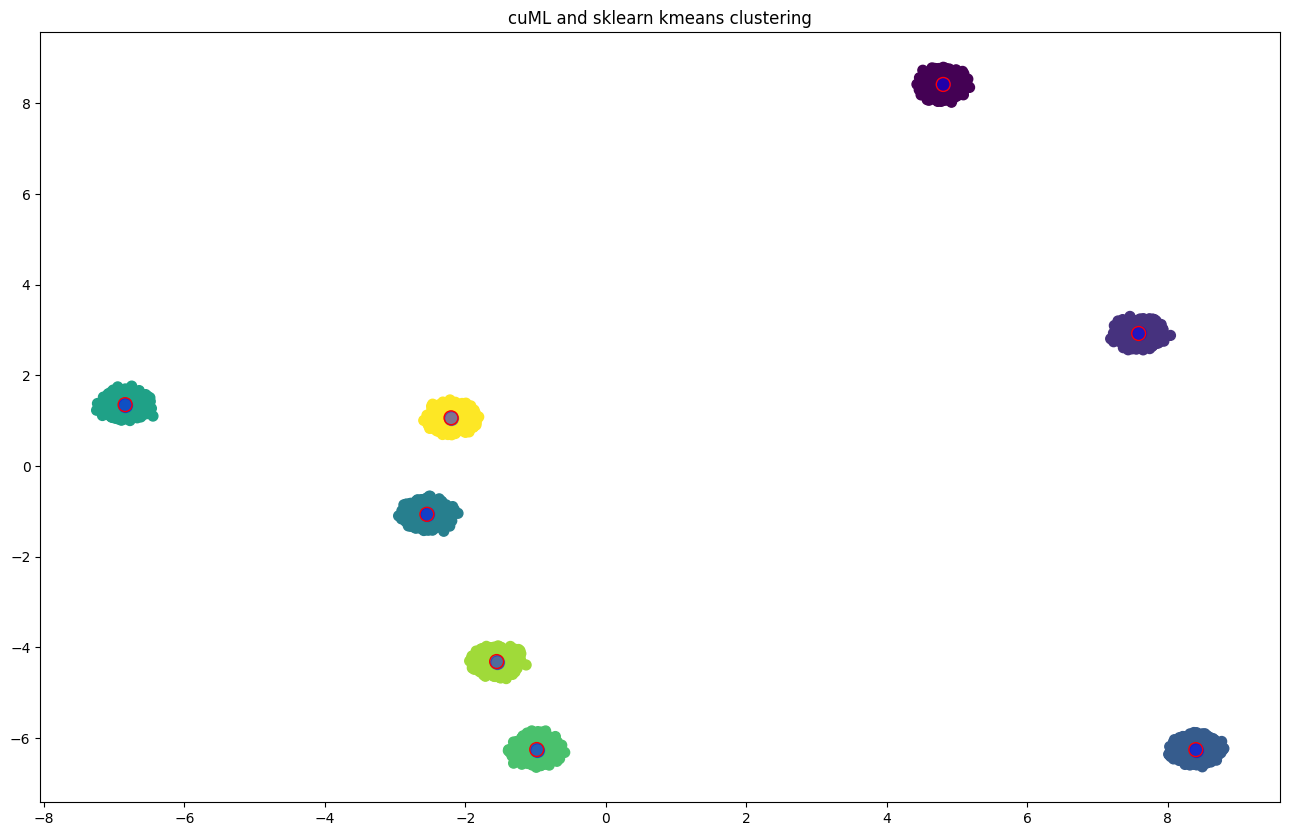

In [24]:
fig = plt.figure(figsize=(16, 10))
plt.scatter(host_data[:, 0], host_data[:, 1], c=host_labels, s=50, cmap='viridis')

#plot the sklearn kmeans centers with blue filled circles
centers_sk = kmeans_sk.cluster_centers_
plt.scatter(centers_sk[:,0], centers_sk[:,1], c='blue', s=100, alpha=.5)

#plot the cuml kmeans centers with red circle outlines
centers_cuml = kmeans_cuml.cluster_centers_
plt.scatter(cupy.asnumpy(centers_cuml[:, 0]),
            cupy.asnumpy(centers_cuml[:, 1]),
            facecolors = 'none', edgecolors='red', s=100)

plt.title('cuML and sklearn kmeans clustering')

plt.show()

In [25]:
%%time
cuml_score = adjusted_rand_score(host_labels, kmeans_cuml.labels_.get())
sk_score = adjusted_rand_score(host_labels, kmeans_sk.labels_)

CPU times: user 20.1 ms, sys: 0 ns, total: 20.1 ms
Wall time: 37.5 ms


In [26]:
threshold = 1e-4

passed = (cuml_score - sk_score) < threshold
print('compare kmeans: cuml vs sklearn labels_ are ' + ('equal' if passed else 'NOT equal'))

compare kmeans: cuml vs sklearn labels_ are equal
